# Explore Rocio's M dwarfs to see if any mass-dependent heating is going on.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from astropy.io import fits

plotpar = {'axes.labelsize': 30,
           'font.size': 30,
           'legend.fontsize': 15,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

In [13]:
df = pd.read_csv("MLSDSS_GaiaDR2_withrv.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
df.head()

,MJD,PLATE,FIBER,solution_id,designation,source_id,ref_epoch_gaia,SPT,RA,RA_ERR,...,L_Z_16per,L_Z_64per,J_Z,J_Z_16per,J_Z_64per,WDM,astrometric_sample,photometric_sample_subg,photometric_sample_subred,photometric_sample_submix
0,54499,2912,8,1635721458409799680,Gaia DR2 3425078058824903552,3425078058824903552,2015,3.0,92.346011,0.056636,...,1883.2203,1887.1929,0.228220,0.221367,0.230958,0,1,1,1,1
1,54521,2887,508,1635721458409799680,Gaia DR2 3426154721227183488,3426154721227183488,2015,3.0,91.660443,0.049904,...,1630.9712,1635.1161,2.639904,2.600802,2.653714,0,1,1,1,1
2,54521,2887,426,1635721458409799680,Gaia DR2 3424698241980887424,3424698241980887424,2015,2.0,90.762250,0.099672,...,1495.7318,1508.3260,0.524292,0.501249,0.533705,0,1,1,1,1
3,54499,2912,156,1635721458409799680,Gaia DR2 3426121491062116224,3426121491062116224,2015,3.0,91.337269,0.050080,...,1556.5614,1562.3890,3.643950,3.548427,3.676243,1,1,1,1,1
4,54499,2912,411,1635721458409799680,Gaia DR2 3426229522376919936,3426229522376919936,2015,2.0,91.587003,0.073336,...,NaN,NaN,NaN,NaN,NaN,0,1,1,1,1


In [16]:
df.keys()

Index(['MJD', 'PLATE', 'FIBER', 'solution_id', 'designation', 'source_id',
       'ref_epoch_gaia', 'SPT', 'RA', 'RA_ERR', 'DEC', 'DEC_ERR', 'PMRA',
       'PMRA_ERR', 'PMDEC', 'PMDEC_ERR', 'RV', 'RV_ERR', 'RA_SDSS', 'DEC_SDSS',
       'PSFMAG', 'PSFMAG_ERR', 'GOODPHOT_SDSS', 'EXTINCTION', 'PMRA_SDSS',
       'PMRA_ERR_SDSS', 'PMDEC_SDSS', 'PMDEC_ERR_SDSS', 'GOODPM_SDSS',
       'MJD_2MASS', 'RA_2MASS', 'DEC_2MASS', 'MAG_2MASS', 'MAG_ERR_2MASS',
       'ACTHA', 'EWHA', 'EWHA_ERR', 'LHALBOL', 'LHALBOL_ERR', 'GOODMATCH',
       'parallax', 'parallax_error', 'parallax_over_error',
       'astrometric_n_good_obs_al', 'astrometric_chi2_al',
       'visibility_periods_used', 'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_flux_over_error', 'phot_g_mean_mag', 'phot_bp_mean_flux',
       'phot_bp_mean_flux_error', 'phot_bp_mean_flux_over_error',
       'phot_bp_mean_mag', 'phot_rp_mean_flux', 'phot_rp_mean_flux_error',
       'phot_rp_mean_flux_over_error', 'phot_rp_mean_mag'

In [75]:
d = 1./df.parallax.values*1e3
m = (200 < d) * (d < 500)
m &= df.parallax.values/df.parallax_error.values > 10
m &= df.V_Z_ERR.values < 10

md = df.iloc[m]

(-200, 200)

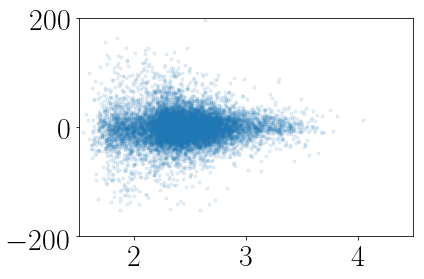

In [76]:
plt.plot(md.phot_bp_mean_mag - md.phot_rp_mean_mag, md.V_Z, ".", alpha=.1)
plt.xlim(1.5, 4.5)
plt.ylim(-200, 200)

In [77]:
from dispersion import *

In [78]:
color_bins = np.linspace(2, 4, 10)
mid_color_bin = np.diff(color_bins)*.5 + color_bins[:-1]

md["bprp"] = md.phot_bp_mean_mag - md.phot_rp_mean_mag
color_masks = select_stars(md, color_bins, "bprp")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


niter =  6 46 stars removed kurtosis =  0.74748042608041
niter =  5 80 stars removed kurtosis =  0.44182621890344453
niter =  4 64 stars removed kurtosis =  0.21773279193828898
niter =  5 23 stars removed kurtosis =  0.13703791107203145
niter =  3 9 stars removed kurtosis =  0.03405138699880972
niter =  3 7 stars removed kurtosis =  0.38352625587257405
niter =  3 2 stars removed kurtosis =  0.20689936039520873
niter =  1 0 stars removed kurtosis =  1.003598122875041
niter =  1 0 stars removed kurtosis =  -2.0


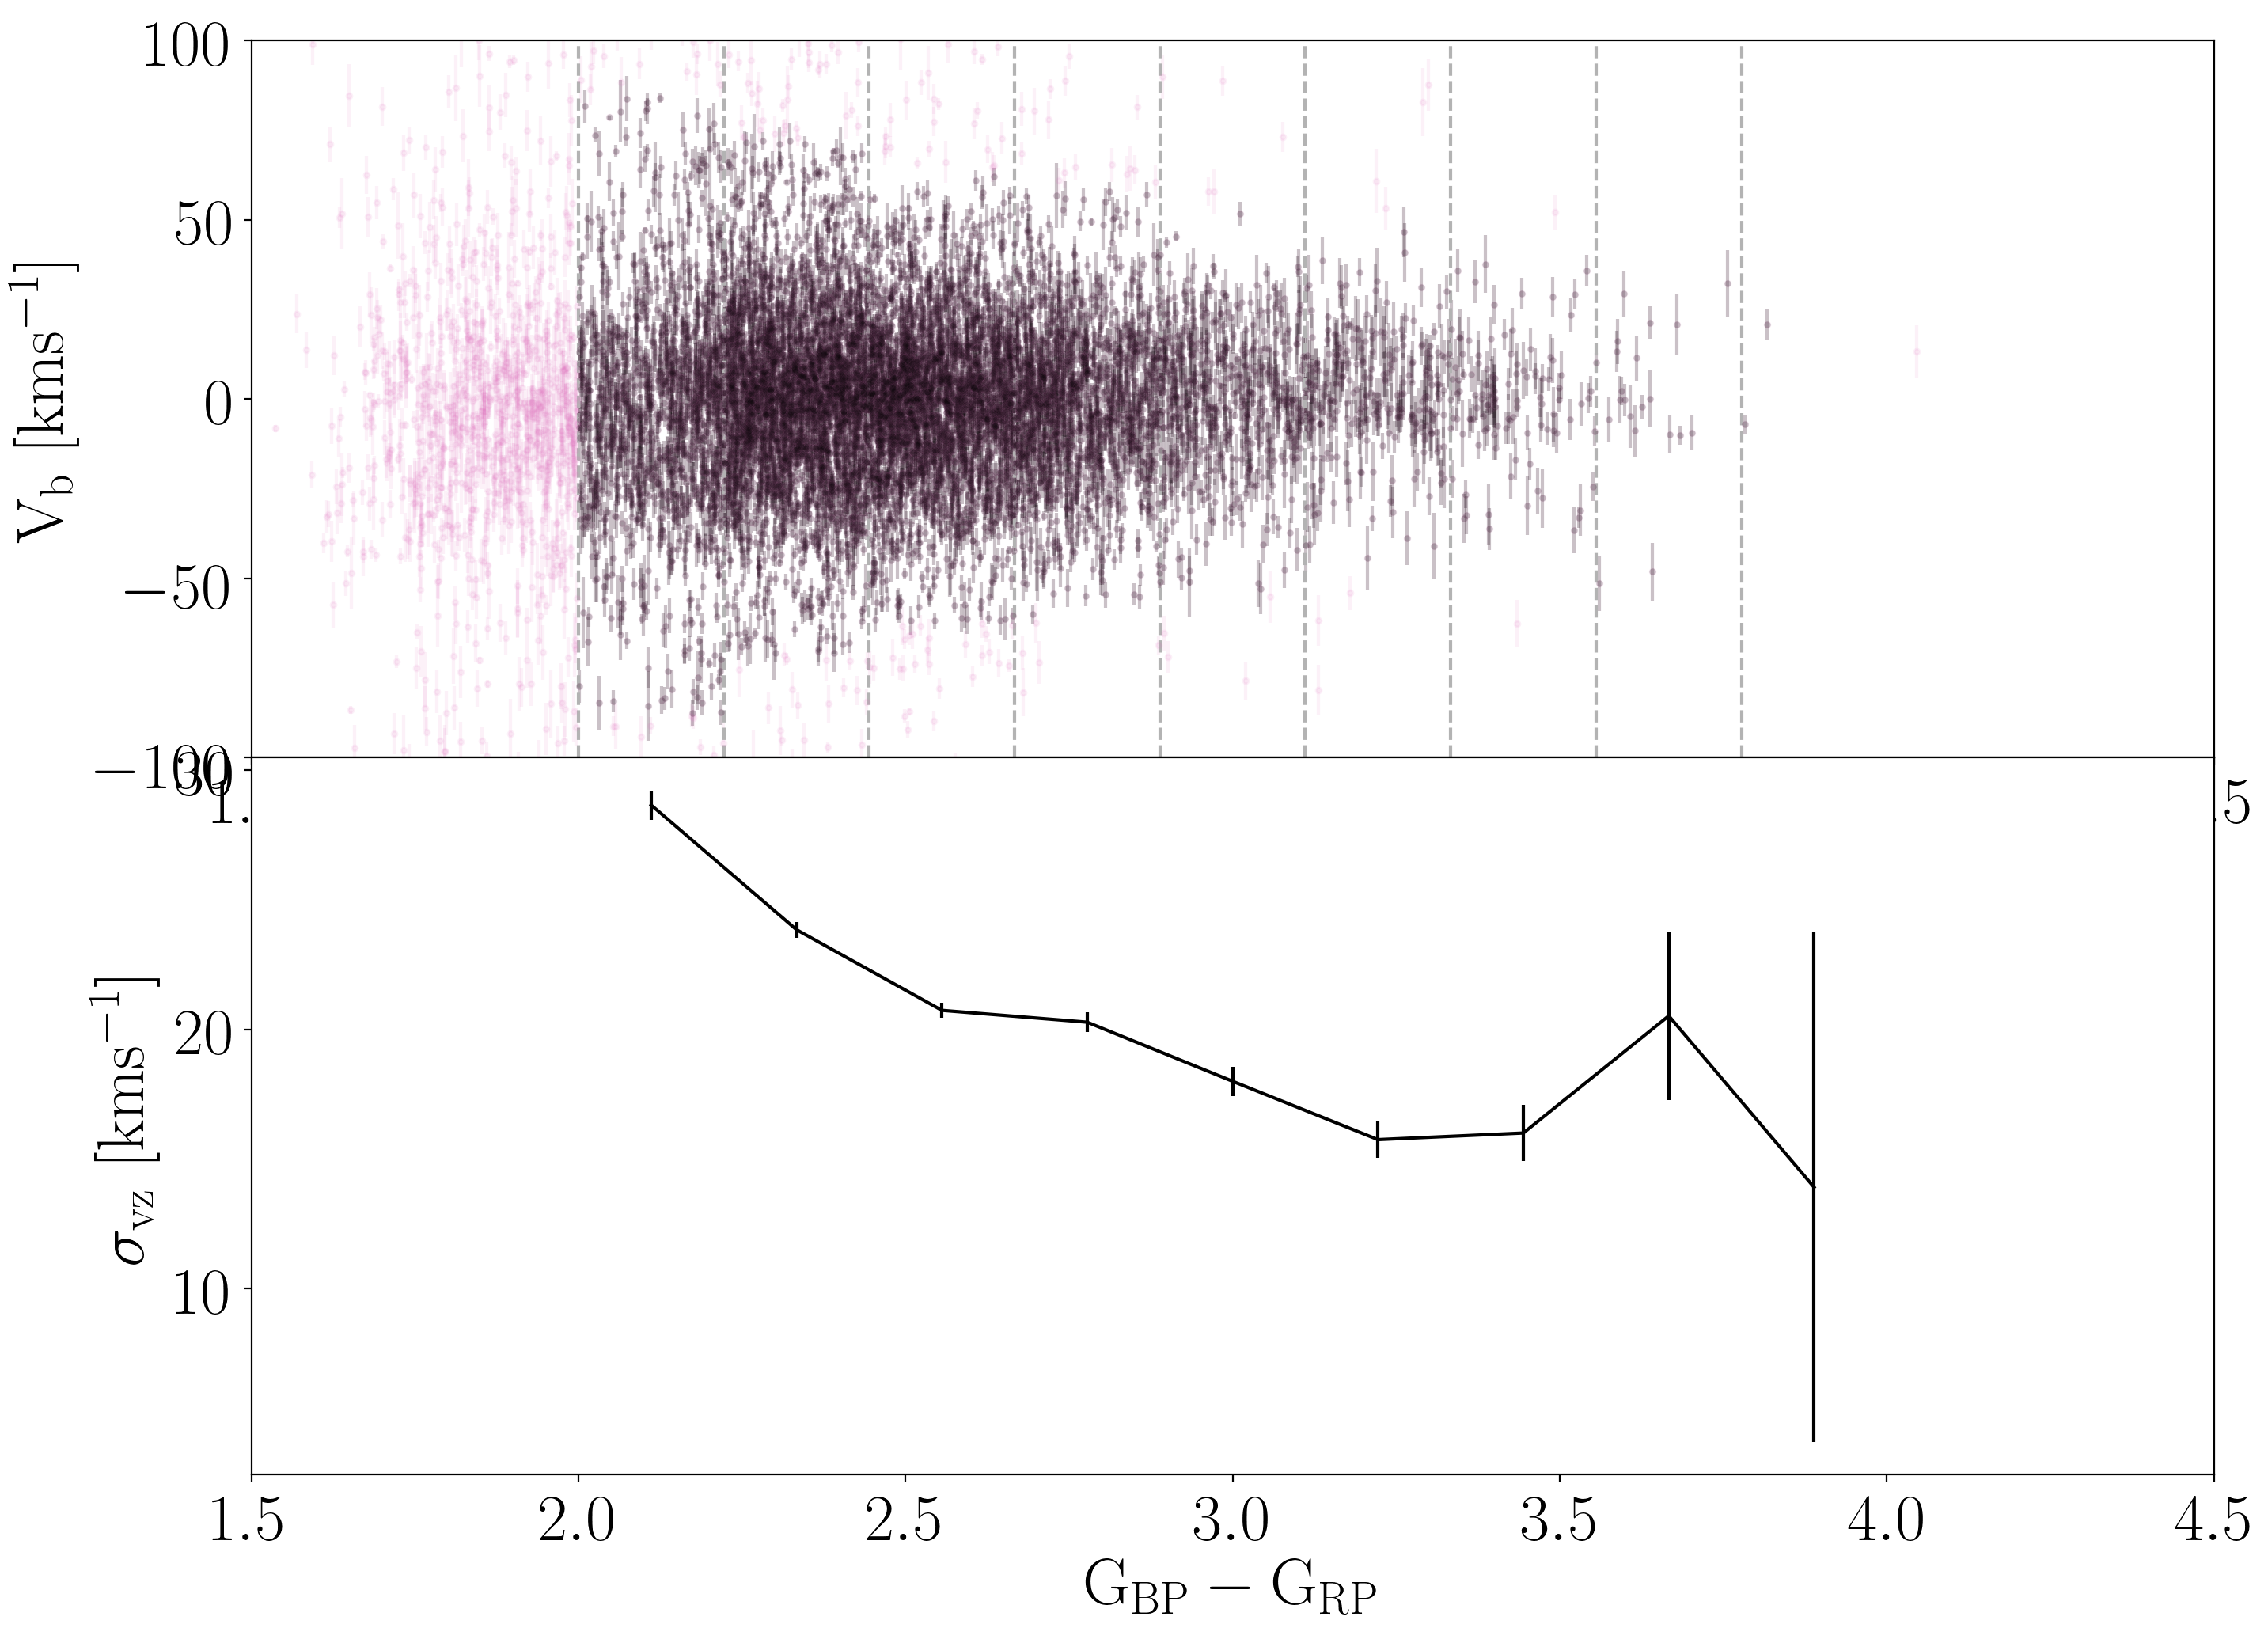

In [79]:
fig = plt.figure(figsize=(16, 12), dpi=200)

v = md.V_Z.values

# Top panel
ax1 = fig.add_subplot(211)
ax1.errorbar(md.bprp, v, yerr=md.V_Z_ERR,
             color="tab:pink", fmt=".", ms=5, rasterized=True, alpha=.1)

greys = [".01", ".01"]
sigma_vz, sigma_vz_err = [], []
for i, m in enumerate(color_masks):
    v_clipped, clipping_mask = sigma_clip(v[m], 3)
    sigma_vz.append(np.std(v_clipped))
    sigma_vz_err.append(err_on_sample_std_dev(np.std(v_clipped), float(len(v_clipped))))
    ax1.errorbar(md.bprp[m][clipping_mask], v[m][clipping_mask],
                 yerr=md.V_Z_ERR[m][clipping_mask],
                 fmt=".", mec="none", color=greys[i % 2], alpha=.2, rasterized=True)
    plt.axvline(color_bins[i], color=".7", ls="--")
ax1.set_ylabel("$\mathrm{V_b~[kms^{-1}]}$")
plt.ylim(-100, 100)
plt.xlim(1.5, 4.5)
    
# Bottom panel
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.errorbar(mid_color_bin, sigma_vz, yerr=sigma_vz_err, fmt="k")
ax2.set_xlabel("$\mathrm{G_{BP}-G_{RP}}$")
ax2.set_ylabel("$\mathrm{\sigma_{vz}~[kms^{-1}]}$")
plt.subplots_adjust(hspace=0)

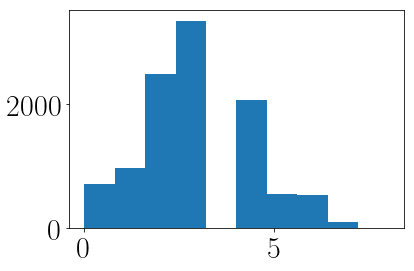